In [94]:
import json

import matplotlib.pyplot as plt
import pandas as pd

versions = pd.DataFrame(columns=['cat', 'count', 'train', 'major', 'data_type'])
for split in ["train", 'test']:
  count = 0
  for cat_type in ["major", "minor"]:
    for data in ['prime','major', 'abs_cat']:
      my_dict = json.load(open("versions/"+"_".join([split, cat_type, data])+".txt"))
      count += sum(my_dict.values())
      temp_versions = pd.DataFrame(my_dict.items(), columns=['cat', 'count'])
      temp_versions["data_type"] = data
      temp_versions["major"] = 1 if cat_type == 'major' else 0
      temp_versions["train"] = 1 if split == 'train' else 0
  
      versions = pd.concat([versions, temp_versions])
      
  print(split, count)

train 203019
test 50576


In [50]:
freqs = pd.DataFrame(columns=['cat', 'count', 'train', 'major', 'data_type'])
for split in ["train", 'test']:
  for cat_type in ["major", "minor"]:
    for data in ['prime','major', 'abs_cat']:
      my_dict = json.load(open("freqs/"+"_".join([split, cat_type, data])+".txt"))
      temp_versions = pd.DataFrame(my_dict.items(), columns=['cat', 'count'])
      temp_versions["data_type"] = data
      temp_versions["major"] = 1 if cat_type == 'major' else 0
      temp_versions["train"] = 1 if split == 'train' else 0
  
      freqs = pd.concat([freqs, temp_versions])

In [101]:
train = 1
major = 0
data_type = "prime"
freqs.loc[(freqs["train"]==train) & (freqs["major"]==major) & (freqs["data_type"]==data_type), ["cat", 'count']].groupby(['cat']).sum().index

Index(['astro-ph', 'astro-ph.CO', 'astro-ph.EP', 'astro-ph.GA', 'astro-ph.HE',
       'astro-ph.IM', 'astro-ph.SR', 'cond-mat.dis-nn', 'cond-mat.mes-hall',
       'cond-mat.mtrl-sci',
       ...
       'q-fin.PR', 'q-fin.RM', 'q-fin.ST', 'q-fin.TR', 'quant-ph', 'stat.AP',
       'stat.CO', 'stat.ME', 'stat.ML', 'stat.OT'],
      dtype='object', name='cat', length=151)

In [102]:
train = 1
major = 1
data_type = "prime"
freqs.loc[(freqs["train"]==train) & (freqs["major"]==major) & (freqs["data_type"]==data_type), ["cat", 'count']].groupby(['cat']).sum().index

Index(['astro-ph', 'astro-ph.CO', 'astro-ph.EP', 'astro-ph.GA', 'astro-ph.HE',
       'astro-ph.IM', 'astro-ph.SR', 'cond-mat.dis-nn', 'cond-mat.mes-hall',
       'cond-mat.mtrl-sci',
       ...
       'q-fin.PR', 'q-fin.RM', 'q-fin.ST', 'q-fin.TR', 'quant-ph', 'stat.AP',
       'stat.CO', 'stat.ME', 'stat.ML', 'stat.OT'],
      dtype='object', name='cat', length=151)

In [66]:
# this is ditrbution of non-1st versions
train = 1
major = 1
data_type = "major"
tr_ma_ma_pct = versions.loc[(versions["train"]==train) & (versions["major"]==major) & (versions["data_type"]==data_type), ["cat", 'count']].groupby(["cat"]).sum().merge(
  freqs.loc[(freqs["train"]==train) & (freqs["major"]==major) & (freqs["data_type"]==data_type), ["cat", 'count']].groupby(["cat"]).sum()
, on="cat", suffixes=('_versions', '_freqs'))
tr_ma_ma_pct["%"] = tr_ma_ma_pct['count_versions'] / tr_ma_ma_pct['count_freqs']
tr_ma_ma_pct[["%"]].astype(float).round(2)

,%
cat,
astro-ph,0.30
cond-mat,0.41
cs,0.29
dg-ga,0.24
econ,0.30
eess,0.27
gr-qc,0.55
hep-ex,0.48
hep-lat,0.42


In [67]:
# this is ditrbution of non-1st versions
train = 0
major = 1
data_type = "major"
te_ma_ma_pct = versions.loc[(versions["train"]==train) & (versions["major"]==major) & (versions["data_type"]==data_type), ["cat", 'count']].groupby(["cat"]).sum().merge(
  freqs.loc[(freqs["train"]==train) & (freqs["major"]==major) & (freqs["data_type"]==data_type), ["cat", 'count']].groupby(["cat"]).sum()
, on="cat", suffixes=('_versions', '_freqs'))
te_ma_ma_pct["%"] = te_ma_ma_pct['count_versions'] / te_ma_ma_pct['count_freqs']
te_ma_ma_pct["%"].astype(float).round(2)

cat
astro-ph    0.31
cond-mat    0.40
cs          0.26
dg-ga       0.20
econ        0.31
eess        0.23
gr-qc       0.57
hep-ex      0.49
hep-lat     0.38
hep-ph      0.54
hep-th      0.67
math        0.48
math-ph     0.48
nlin        0.32
nucl-ex     0.34
nucl-th     0.36
physics     0.30
q-bio       0.31
q-fin       0.35
quant-ph    0.49
stat        0.38
Name: %, dtype: float64

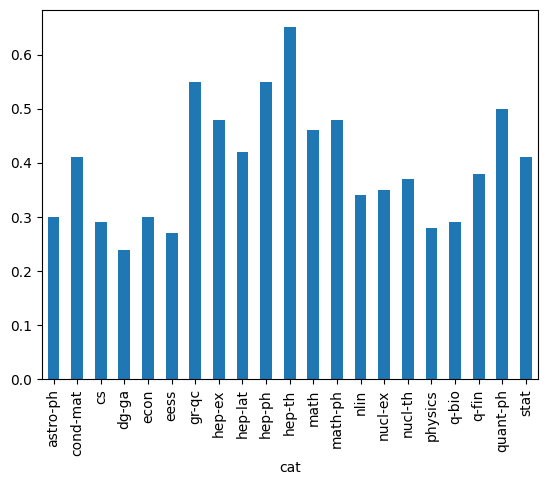

In [79]:
tr_ma_ma_pct["%"].astype(float).round(2).plot(kind='bar')
plt.show()

In [88]:
from scipy.stats import zscore
z = zscore(tr_ma_ma_pct["%"].astype(float))
z.loc[(z > 1.96) | (z < -1.96)]

cat
hep-th    2.356461
Name: %, dtype: float64

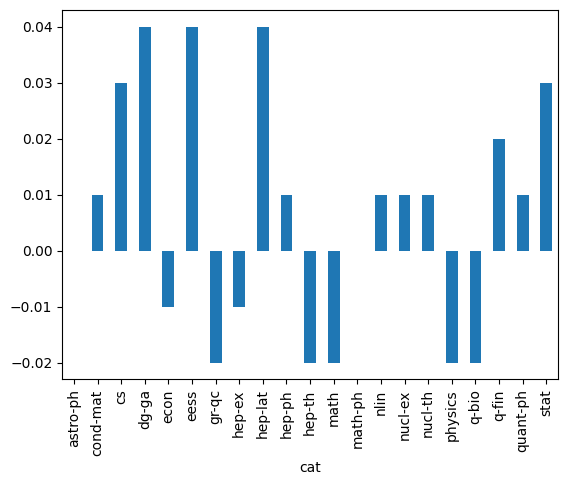

In [89]:
pct_dif = tr_ma_ma_pct[["%"]].merge(te_ma_ma_pct[["%"]], on='cat', suffixes=['tr', 'te'])
(pct_dif['%tr'] - pct_dif['%te']).astype(float).round(2).plot(kind='bar')
plt.show()